<a href="https://colab.research.google.com/github/MUSA-650/musa-650-spring-2025/blob/main/DL_Basics1_SimpleMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Multi-layer perceptron extended to classify digits+fashion**


In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist, fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from tensorflow.python.keras.utils import np_utils


**Set vars, load MNIST (hand written digits + fashion) data**

In [ ]:
batch_size = 20000
num_classes = 10
epochs = 5

# the data, split between train and test sets
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
(x_train_fmnist, y_train_fmnist), (x_test_fmnist, y_test_fmnist) = fashion_mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train_mnist.shape

(60000, 28, 28)

In [ ]:
np.sum(y_train_mnist==8)

5851

**Visualize data**

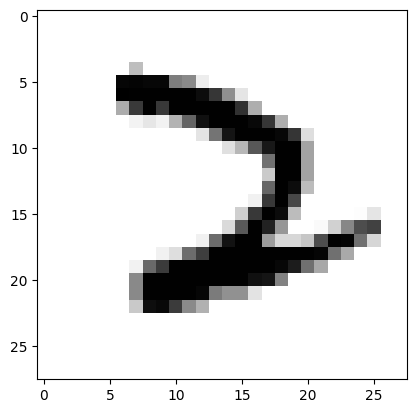

In [ ]:
import matplotlib.pyplot as plt

n=3890
plt.imshow(x_train_mnist[n],cmap=plt.cm.binary)
plt.show()

In [ ]:
## ??? Visualize the fashion data

#### Combine mnist and fmnist

In [ ]:
# Update y_train_fmnist
y_train_fmnist = y_train_fmnist + 10
x_train = np.concatenate((x_train_mnist, x_train_fmnist), axis=0)
y_train = np.concatenate((y_train_mnist, y_train_fmnist), axis=0)

In [ ]:
# Update y_train_fmnist
y_test_fmnist = y_test_fmnist + 10
x_test = np.concatenate((x_test_mnist, x_test_fmnist), axis=0)
y_test = np.concatenate((y_test_mnist, y_test_fmnist), axis=0)

In [ ]:
import numpy as np
# Shuffle the training data
permutation = np.random.permutation(x_train.shape[0])
x_train = x_train[permutation]
y_train = y_train[permutation]


In [ ]:
x_test.shape

(20000, 28, 28)

#### Flatten and scale

In [ ]:
x_train = x_train.reshape(120000, 784)
x_test = x_test.reshape(20000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train[0:20]

120000 train samples
20000 test samples


array([10, 16, 12,  6,  7, 13,  1, 15, 12, 12, 11,  3,  6,  7, 18, 16, 18,
       17, 15,  7], dtype=uint8)

In [ ]:
y_train.shape

(120000,)

In [ ]:
# convert class vectors to binary class matrices
num_classes = 20
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

y_train.shape

(120000, 20)

In [ ]:
y_train[0:20,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

**Model description**

- Put the "lego blocks" together


In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,700 (217.58 KB)

 Trainable params: 55,700 (217.58 KB)

 Non-trainable params: 0 (0.00 B)

**Visualization of the model**

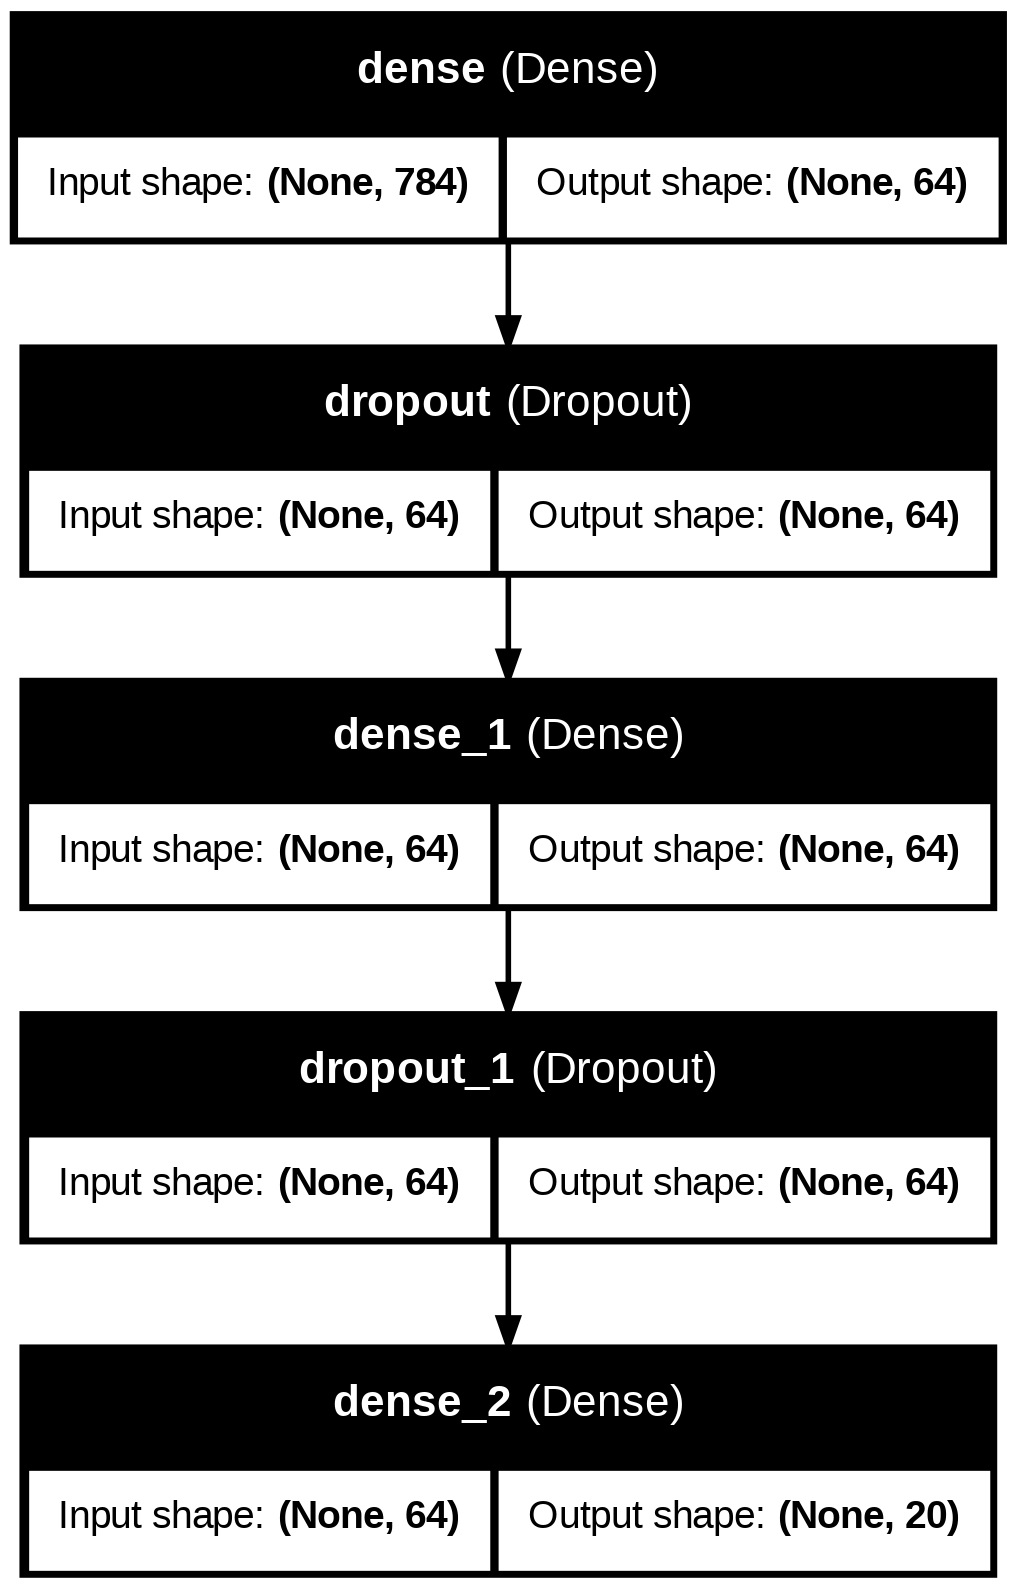

In [ ]:
from tensorflow.keras.utils import plot_model

#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
plot_model(model, show_shapes=True, show_layer_names=True)

**Compile the model**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

**Fit the model**

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.1307 - loss: 2.8930 - val_accuracy: 0.4178 - val_loss: 2.2867
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.3660 - loss: 2.2836 - val_accuracy: 0.5922 - val_loss: 1.7202
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.4738 - loss: 1.8770 - val_accuracy: 0.6485 - val_loss: 1.3998
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.5446 - loss: 1.5960 - val_accuracy: 0.6959 - val_loss: 1.1652
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.5912 - loss: 1.4005 - val_accuracy: 0.7319 - val_loss: 1.0090
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.6272 - loss: 1.2530 - val_accuracy: 0.7510 - val_loss: 0.8907
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.6528 - loss: 1.1428 - val_accuracy: 0.7672 - val_loss: 0.8155
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.6786 - loss: 1.0482 - val_accuracy: 0.7815 - val_loss:

**Evaluate the model**

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.662801206111908
Test accuracy: 0.79830002784729


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


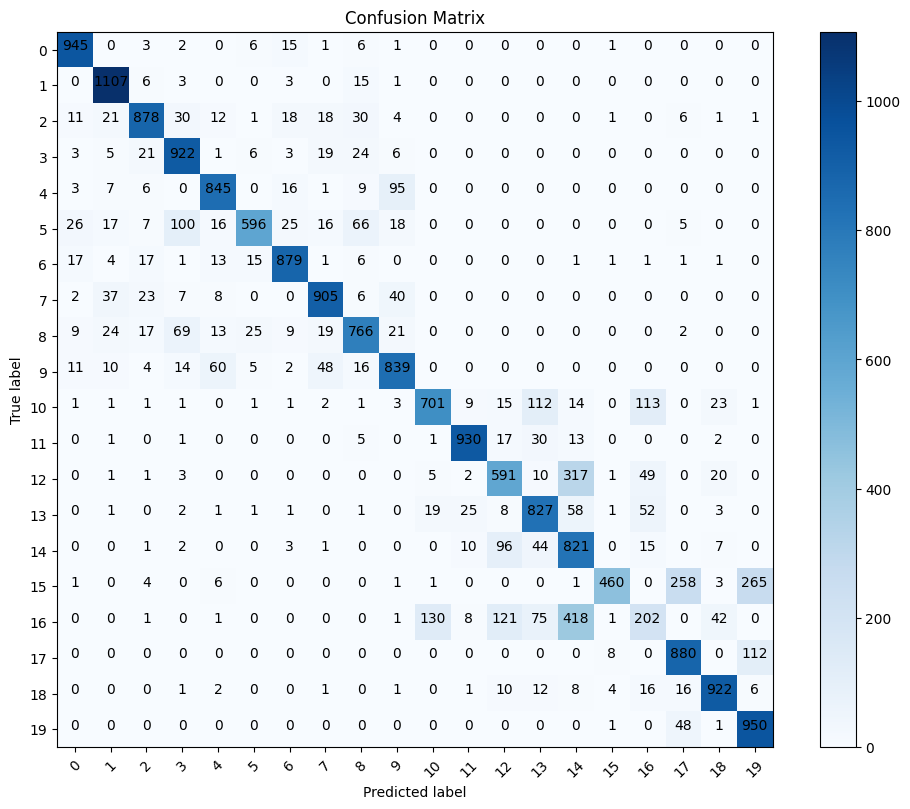

In [ ]:
# prompt: create the confusion matrix

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have already trained the model and have x_test and y_test
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes), rotation=45)
plt.yticks(tick_marks, range(num_classes))

thresh = cm.max() / 2.
thresh = 0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
## ??? What does the confusion matrix show? Do you see any patterns?
